In [0]:
!mkdir frames
!mkdir animations
!pip install imageio

rm: cannot remove 'frames/*': No such file or directory

Iteration      Loss                  Cov                   Prec                  Analytic Cov          Analytic Avg Abs Diff 
1              -0.00838105181986     0.00838105181986      0.665010196607        0.001                 0.0113097874479       
1001           -0.0217069520582      0.0217069520582       0.487927760136        0.008                 0.239499545515        
2001           -0.0194846241431      0.0194846241431       0.560125631968        0.005                 0.227926345928        
3001           -0.0172090680432      0.0172090680432       0.642045020473        0.004                 0.243623979327        
4001           -0.0240919973958      0.0240919973958       0.478244991659        0.006                 0.267482881613        
5001           -0.0316622137329      0.0316622137329       0.482958534832        0.017                 0.287295703297        
6001           -0.0224673824201      0.0224673824201       0.

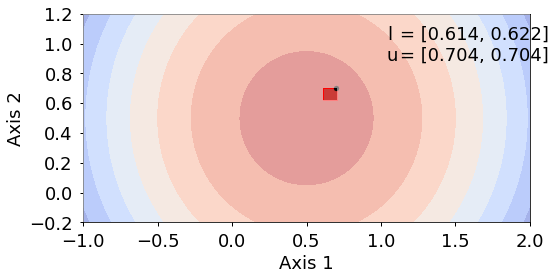

In [0]:
!rm -r frames/*
from explain_reg_new import explain
import tensorflow as tf
import numpy as np
import imageio
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import shapely.geometry as sg
from pylab import text
plt.style.use('seaborn-notebook')
import descartes
images = []
fig, ax = plt.subplots(1)
radius = 0.3
def f(points):
  return (1-np.square(points[:, 0] - 0.5) - np.square(points[:, 1] - 0.5))
  #1 - np.square(points[:, 0] - 0.5) - np.square(points[:, 1] - 0.5)
  #np.cos(points[:, 0] * np.pi * 1.5) * np.cos(points[:, 1] * np.pi * 1.5)
def pretty_print(string):
  return string + "0" * (5 - len(string))
def plot_function(iteration, l_vals, u_vals):
  if iteration != 9999:
    return
  plt.cla()
  plt.rcParams.update({'font.size': 18})
  for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(18) 
  for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(18)
  plt.axis([-1.0, 2.0, -0.2, 1.2])
  currentAxis = plt.gca()
  rect_lower_0 = l_vals[0]
  rect_lower_1 = l_vals[1]
  rect_upper_0 = u_vals[0]
  rect_upper_1 = u_vals[1]
  plt.xlabel('Axis 1', fontsize = 18)
  plt.ylabel('Axis 2', fontsize = 18)
  text(0.68, 0.9,'l',
     horizontalalignment='left',
     verticalalignment='center',
     transform = ax.transAxes, zorder = 100)
  text(0.71, 0.9,'= [' + pretty_print(str(np.around(l_vals[0], decimals = 3))) + ', ' + pretty_print(str(np.around(l_vals[1], decimals = 3))) + ']',
     horizontalalignment='left',
     verticalalignment='center',
     transform = ax.transAxes, zorder = 100)
  text(0.68, 0.8,'u',
     horizontalalignment='left',
     verticalalignment='center',
     transform = ax.transAxes, zorder = 100)
  text(0.71, 0.8,'= [' + pretty_print(str(np.around(u_vals[0], decimals = 3))) + ', ' + pretty_print(str(np.around(u_vals[1], decimals = 3))) + ']',
     horizontalalignment='left',
     verticalalignment='center',
     transform = ax.transAxes, zorder = 100)
  rect_sg_comp = sg.Polygon([(-1.0, -0.2), (2.0, -0.2), (2.0, 1.2), (-1.0, 1.2)])
  rect_sg = sg.Polygon([(l_vals[0], l_vals[1]), (u_vals[0], l_vals[1]), (u_vals[0], u_vals[1]), (l_vals[0], u_vals[1])])
  intersection = rect_sg_comp.difference(rect_sg)
  if rect_lower_0 < rect_upper_0 and rect_lower_1 < rect_upper_1:
      color = 'r'
  else:
      color = 'g'
  rect = patches.Rectangle((rect_lower_0, rect_lower_1), rect_upper_0 - rect_lower_0, rect_upper_1 - rect_lower_1, linewidth = 1, edgecolor = 'r', facecolor = 'none', zorder = 10)
  ax.add_patch(descartes.PolygonPatch(intersection, fc = 'w', alpha = 0.5, linewidth = 0, zorder = 100))
  #ax.plot([-1.0, 2.0], [0, 0], linestyle = "--", color = "black", linewidth = 1)
  #ax.plot([-1.0, 2.0], [1, 1], linestyle = "--", color = "black", linewidth = 1)
  #ax.plot([0, 0], [-0.2, 1.2], linestyle = "--", color = "black", linewidth = 1)
  #ax.plot([1, 1], [-0.2, 1.2], linestyle = "--", color = "black", linewidth = 1)
  #rect = patches.Rectangle((0, 0), 1, 1, linewidth = 1, edgecolor = 'b', facecolor = 'none', zorder = 7)
  currentAxis.add_patch(rect)
  xq = np.linspace(-1.0, 2.0, 1000)
  yq = np.linspace(-0.2, 1.2, 1000)
  xy1 = np.meshgrid(xq, yq)[0]
  xy2 = np.meshgrid(xq, yq)[1]
  zs =  (1 - np.square(xy1 - 0.5) - np.square(xy2 - 0.5))#np.cos(xy1 * np.pi * 1.5) * np.cos(xy2 * np.pi * 1.5)
  plt.contourf(xy1, xy2, zs, cmap = plt.cm.get_cmap("coolwarm"))
  plt.scatter([point[0]], [point[1]], s = [25.0], color = 'black', zorder = 20)
  #plt.xticks(np.arange(-1.0, 2.0, 0.4))
  #plt.yticks(np.arange(-0.2, 1.2, 0.2))
  plt.gca().set_aspect('equal', adjustable='box')
  plt.savefig("Para_pt7_pt7_3_inv.pdf", bbox_inches = "tight")
  #images.append(imageio.imread("frames/" + str(iteration) + ".png"))
class synth(explain):
  def sampling(self, num_sampled_points):
    #sampled_points = np.random.uniform(0.0, 1.0, (num_sampled_points, 2))
    sampled_points = np.random.uniform(0.0, 1.0, (num_sampled_points, 2))
    #sampled_points[0:num_sampled_points/2, :] = np.random.uniform(self.temp_l_vec_values, self.temp_u_vec_values, (num_sampled_points/2, 2))
    sampled_points[0, :] = np.random.uniform(self.temp_l_vec_values, self.temp_u_vec_values, (1, 2))    
    f_values = f(sampled_points)
    return sampled_points, f_values
point = np.array([0.7, 0.7])
all_x_vals = np.linspace(0.0, 1.0, 1000)
x_vals, y_vals = np.meshgrid(all_x_vals, all_x_vals)
dataset_std = np.std((1 - (x_vals - 0.5)**2 - (y_vals - 0.5)**2) )
synth_object = synth(point, 1000, np.array([f(np.array([point]))]), 5, 5, 0.3, dataset_std, plot_function)
synth_object.fit_explanation(10000, verbose = 1000)
#prefix = "Circle_NonCenter_2_0.80_"
#imageio.mimsave("animations/" + prefix + "animation.gif", images, loop = 1)


Iteration      Loss                  Cov                   Prec                  Analytic Cov          Analytic Prec         
1              -0.409760118814       0.409760118814        0.997093377192        0.5                   1.0                   


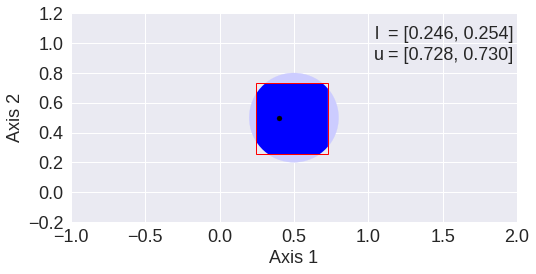

In [0]:
!rm -r frames/*
from explain_viz import explain
import tensorflow as tf
import numpy as np
import imageio
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import shapely.geometry as sg
from pylab import text
import descartes
plt.style.use('seaborn-notebook')
images = []
fig, ax = plt.subplots(1)
radius = 0.3
def f(points):
  return np.less(np.sum(np.square(points - np.array([0.5, 0.5])), 1) - (radius ** 2), 0.0)
def pretty_print(string):
  return string + "0" * (5 - len(string))
def plot_function(iteration, l_vals, u_vals):
  if iteration != 2970:
    return
  plt.cla()
  plt.rcParams.update({'font.size': 18})
  for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(18) 
  for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(18) 
  circle = plt.Circle((0.5, 0.5), 0.3, color = [0.8, 0.8, 1.0], zorder = 5)
  plt.axis([-1.0, 2.0, -0.2, 1.2])
  currentAxis = plt.gca()
  currentAxis.add_artist(circle)
  rect_lower_0 = l_vals[0]
  rect_lower_1 = l_vals[1]
  rect_upper_0 = u_vals[0]
  rect_upper_1 = u_vals[1]
  plt.xlabel('Axis 1', fontsize = 18)
  plt.ylabel('Axis 2', fontsize = 18)
  text(0.68, 0.9,'l',
     horizontalalignment='left',
     verticalalignment='center',
     transform = ax.transAxes)
  text(0.71, 0.9,'= [' + pretty_print(str(np.around(l_vals[0], decimals = 3))) + ', ' + pretty_print(str(np.around(l_vals[1], decimals = 3))) + ']',
     horizontalalignment='left',
     verticalalignment='center',
     transform = ax.transAxes)
  text(0.68, 0.8,'u',
     horizontalalignment='left',
     verticalalignment='center',
     transform = ax.transAxes)
  text(0.71, 0.8,'= [' + pretty_print(str(np.around(u_vals[0], decimals = 3))) + ', ' + pretty_print(str(np.around(u_vals[1], decimals = 3))) + ']',
     horizontalalignment='left',
     verticalalignment='center',
     transform = ax.transAxes)
  circle_sg = sg.Point(0.5,0.5).buffer(0.3)
  rect_sg = sg.Polygon([(l_vals[0], l_vals[1]), (u_vals[0], l_vals[1]), (u_vals[0], u_vals[1]), (l_vals[0], u_vals[1])])
  intersection = circle_sg.intersection(rect_sg)
  if rect_lower_0 < rect_upper_0 and rect_lower_1 < rect_upper_1:
      color = 'r'
  else:
      color = 'g'
  rect = patches.Rectangle((rect_lower_0, rect_lower_1), rect_upper_0 - rect_lower_0, rect_upper_1 - rect_lower_1, linewidth = 1, edgecolor = 'r', facecolor = 'none', zorder = 10)
  #ax.plot([-1.0, 2.0], [0, 0], linestyle = "--", color = "black", linewidth = 1)
  #ax.plot([-1.0, 2.0], [1, 1], linestyle = "--", color = "black", linewidth = 1)
  #ax.plot([0, 0], [-0.2, 1.2], linestyle = "--", color = "black", linewidth = 1)
  #ax.plot([1, 1], [-0.2, 1.2], linestyle = "--", color = "black", linewidth = 1)
  #rect = patches.Rectangle((0, 0), 1, 1, linewidth = 1, edgecolor = 'b', facecolor = 'none', zorder = 7)
  currentAxis.add_patch(rect)
  ax.add_patch(descartes.PolygonPatch(intersection, fc = 'b', linewidth = 0, zorder = 7))
  plt.scatter([0.4], [0.5], s = [25.0], color = 'black', zorder = 20)
  #plt.xticks(np.arange(-1.0, 2.0, 0.4))
  #plt.yticks(np.arange(-0.2, 1.2, 0.2))
  plt.gca().set_aspect('equal', adjustable='box')
  plt.savefig("frames/Circle_0_pt_95.pdf", bbox_inches = "tight")
  #images.append(imageio.imread("frames/" + str(iteration) + ".png"))
class synth(explain):
  def sampling(self, num_sampled_points):
    #sampled_points = np.random.uniform(0.0, 1.0, (num_sampled_points, 2))
    sampled_points = np.random.uniform(0.0, 1.0, (num_sampled_points, 2))
    sampled_points[0:num_sampled_points/2, :] = np.random.uniform(self.temp_l_vec_values, self.temp_u_vec_values, (num_sampled_points/2, 2))
    
    f_values = f(sampled_points)
    return sampled_points, f_values
point = np.array([0.4, 0.5])
synth_object = synth(point, 50, np.array([f(np.array([point]))]), 5, 5, 0.95, plot_function)
synth_object.fit_explanation(3000)
#prefix = "Circle_NonCenter_2_0.80_"
#imageio.mimsave("animations/" + prefix + "animation.gif", images, loop = 1)

In [0]:
print(plt.style.available)

['seaborn-darkgrid', 'Solarize_Light2', 'seaborn-notebook', 'classic', 'seaborn-ticks', 'grayscale', 'bmh', 'seaborn-talk', 'dark_background', 'ggplot', 'fivethirtyeight', '_classic_test', 'seaborn-colorblind', 'seaborn-deep', 'seaborn-whitegrid', 'seaborn', 'seaborn-poster', 'seaborn-bright', 'seaborn-muted', 'seaborn-paper', 'seaborn-white', 'fast', 'seaborn-pastel', 'seaborn-dark', 'tableau-colorblind10', 'seaborn-dark-palette']


rm: cannot remove 'frames/*': No such file or directory
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use `tf.global_variables_initializer` instead.

Iteration      Loss                  Cov                   Prec                  Analytic Cov          Analytic Prec         
1              -0.41177030067        0.41177030067         0.999039976429        0.5                   1.0                   
1001           -0.72030537169        0.72030537169         0.995028038659        0.72                  1.0                   
2001           -5.53679155799        0.706531102972        0.966052091003        0.7                   0.971428571429        


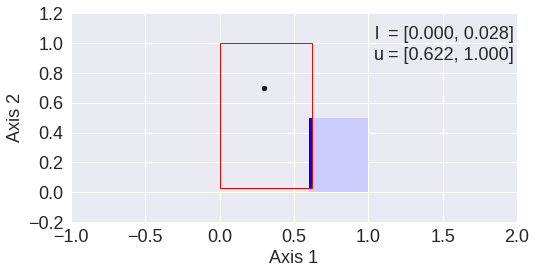

In [0]:
!rm -r frames/*
from explain_viz import explain
import tensorflow as tf
import numpy as np
import imageio
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import shapely.geometry as sg
import descartes
from pylab import text
images = []
fig, ax = plt.subplots(1)
radius = 0.3
def f(points):
  return np.logical_and(np.greater(points[:, 0], 0.6), np.less(points[:, 1], 0.5))
  #np.less(np.sum(np.square(points - np.array([0.5, 0.5])), 1) - (radius ** 2), 0.0)
def pretty_print(string):
  return string + "0" * (5 - len(string))

def plot_function(iteration, l_vals, u_vals):
  if iteration != 2970:
    return
  plt.cla()
  #circle = plt.Circle((0.5, 0.5), 0.3, color = 'b', zorder = 5)
  plt.axis([-1.0, 2.0, -0.2, 1.2])
  currentAxis = plt.gca()
  plt.rcParams.update({'font.size': 18})
  for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(18) 
  for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(18) 
  #currentAxis.add_artist(circle)
  rect_lower_0 = l_vals[0]
  rect_lower_1 = l_vals[1]
  rect_upper_0 = u_vals[0]
  rect_upper_1 = u_vals[1]
  plt.xlabel('Axis 1', fontsize = 18)
  plt.ylabel('Axis 2', fontsize = 18)
  text(0.68, 0.9,'l',
     horizontalalignment='left',
     verticalalignment='center',
     transform = ax.transAxes)
  text(0.71, 0.9,'= [' + pretty_print(str(np.around(l_vals[0], decimals = 3))) + ', ' + pretty_print(str(np.around(l_vals[1], decimals = 3))) + ']',
     horizontalalignment='left',
     verticalalignment='center',
     transform = ax.transAxes)
  text(0.68, 0.8,'u',
     horizontalalignment='left',
     verticalalignment='center',
     transform = ax.transAxes)
  text(0.71, 0.8,'= [' + pretty_print(str(np.around(u_vals[0], decimals = 3))) + ', ' + pretty_print(str(np.around(u_vals[1], decimals = 3))) + ']',
     horizontalalignment='left',
     verticalalignment='center',
     transform = ax.transAxes)
  if rect_lower_0 < rect_upper_0 and rect_lower_1 < rect_upper_1:
      color = 'r'
  else:
      color = 'g'
  rect_sg1 = sg.Polygon([(0.6, 0.0), (1.0, 0.0), (1.0, 0.5), (0.6, 0.5)])
  rect_sg = sg.Polygon([(l_vals[0], l_vals[1]), (u_vals[0], l_vals[1]), (u_vals[0], u_vals[1]), (l_vals[0], u_vals[1])])
  intersection = rect_sg1.intersection(rect_sg)
  rect = patches.Rectangle((rect_lower_0, rect_lower_1), rect_upper_0 - rect_lower_0, rect_upper_1 - rect_lower_1, linewidth = 1, edgecolor = 'r', facecolor = 'none', zorder = 10)
  rect1 = patches.Rectangle((0.6, 0.0), 0.4, 0.5, linewidth = 0, edgecolor = 'r', facecolor = [0.8, 0.8, 1.0], zorder = 5)
  
  #ax.plot([-1.0, 2.0], [0, 0], linestyle = "--", color = "black", linewidth = 1)
  #ax.plot([-1.0, 2.0], [1, 1], linestyle = "--", color = "black", linewidth = 1)
  #ax.plot([0, 0], [-0.2, 1.2], linestyle = "--", color = "black", linewidth = 1)
  #ax.plot([1, 1], [-0.2, 1.2], linestyle = "--", color = "black", linewidth = 1)
  #rect = patches.Rectangle((0, 0), 1, 1, linewidth = 1, edgecolor = 'b', facecolor = 'none', zorder = 7)
  currentAxis.add_patch(rect)
  currentAxis.add_patch(rect1)
  ax.add_patch(descartes.PolygonPatch(intersection, fc = 'b', linewidth = 0, zorder = 7))
  plt.scatter([0.3], [0.7], s = [25.0], color = 'black', zorder = 20)
  #plt.xticks(np.arange(-1.0, 2.0, 0.4))
  #plt.yticks(np.arange(-0.2, 1.2, 0.2))
  plt.gca().set_aspect('equal', adjustable='box')
  plt.savefig("frames/Rect_neg.pdf", bbox_inches = "tight")
  #images.append(imageio.imread("frames/" + str(iteration) + ".png"))
class synth(explain):
  def sampling(self, num_sampled_points):
    #sampled_points = np.random.uniform(0.0, 1.0, (num_sampled_points, 2))
    sampled_points = np.random.uniform(0.0, 1.0, (num_sampled_points, 2))
    sampled_points[0:num_sampled_points/2, :] = np.random.uniform(self.temp_l_vec_values, self.temp_u_vec_values, (num_sampled_points/2, 2))
    
    f_values = f(sampled_points)
    return sampled_points, f_values
point = np.array([0.3, 0.7])
synth_object = synth(point, 50, np.array([f(np.array([point]))]), 5, 5, 0.98, plot_function)
synth_object.fit_explanation(3000)
#prefix = "Circle_NonCenter_2_0.80_"
#imageio.mimsave("animations/" + prefix + "animation.gif", images, loop = 1)


Iteration      Loss                  Cov                   Prec                  Analytic Cov          Analytic Prec         
1              -0.0176654891438      0.0176654891438       0.576388403617        0.008                 1.0                   
1001           -3.82398633663        0.238931587736        0.717010949778        0.196                 0.882653061224        
2001           -0.202526975105       0.202526975105        0.708858489908        0.156                 0.916666666667        
[0.45585072 0.27549594] [0.66977439 0.70812137]
[0.45575529 0.27540473] [0.66986392 0.7082007 ]
(0.9444444444444444, 2999, array([0.45585072, 0.27549594]), array([0.66977439, 0.70812137]))


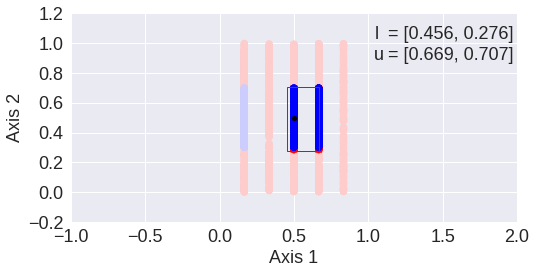

In [0]:
!rm -r frames/*
from explain_viz import explain
import tensorflow as tf
import numpy as np
from pylab import text
import imageio
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
def class_translator(class_num, discrete_categories):
  return (class_num + 1) * 1.0/(discrete_categories + 1)
images = []
fig, ax = plt.subplots(1)
discrete_categories = 5
n = 1000
viz_xt = np.zeros((n, 2))
viz_xt[0:int(n*0.75), 0] = class_translator(np.random.randint(2, 4, (int(n * 0.75), )).astype(float), discrete_categories)
viz_xt[int(n*0.75):n, 0] = class_translator(np.random.randint(0, 1, (n - int(n * 0.75), )).astype(float), discrete_categories)
viz_xt[:, 1] = np.random.uniform(0.3, 0.7, (n, ))
neg_xt = np.zeros((n, 2))
neg_xt[0:int(n*0.2), 0] = class_translator(np.random.randint(1, 2, (int(n * 0.2), )).astype(float), discrete_categories)
neg_xt[int(n*0.2):int(n*0.4), 0] = class_translator(np.random.randint(4, 5, (int(n*0.4) - int(n * 0.2), )).astype(float), discrete_categories)
neg_xt[int(n*0.4):int(n*0.8), 0] = class_translator(np.random.randint(2, 4, (int(n*0.8) - int(n * 0.4), )).astype(float), discrete_categories)
neg_xt[int(n*0.8):n, 0] = class_translator(np.random.randint(0, 1, (n - int(n * 0.8), )).astype(float), discrete_categories)
temp_a = np.random.uniform(0, 0.6, (n - int(n*0.4), ))
temp_a[temp_a[:] > 0.3] = temp_a[temp_a[:] > 0.3] + 0.4
neg_xt[int(n * 0.4):n, 1] = temp_a[:]
neg_xt[0:int(n*0.4), 1] = np.random.uniform(0, 1, (int(n*0.4), ))
def f(points):
  return np.logical_and(np.logical_or(np.equal(points[:, 0], class_translator(0.0, 5)), np.logical_or(np.equal(points[:, 0], class_translator(2.0, 5)), np.equal(points[:, 0], class_translator(3.0, 5)))), np.logical_and(np.greater(points[:, 1], 0.3), np.less(points[:, 1], 0.7)))
def pretty_print(string):
  return string + "0" * (5 - len(string))
def plot_function(iteration, l_vals, u_vals):
  if iteration != 2970:
    return
  plt.cla()
  plt.rcParams.update({'font.size': 18})
  for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(18) 
  for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(18) 
  #plt.axis([-1, 2, -1, 2])
  plt.axis([-1.0, 2.0, -0.2, 1.2])
  currentAxis = plt.gca()
  rect_lower_0 = l_vals[0]
  rect_lower_1 = l_vals[1]
  rect_upper_0 = u_vals[0]
  rect_upper_1 = u_vals[1]
  light_red = [1.0, 0.8, 0.8]
  dark_red = [1.0, 0.0, 0.0]
  light_blue = [0.8, 0.8, 1.0]
  dark_blue = [0.0, 0.0, 1.0]
  neg_colors = []
  for i in range(neg_xt.shape[0]):
    if neg_xt[i, 0] > rect_lower_0 and neg_xt[i, 0] <= rect_upper_0 and neg_xt[i, 1] > rect_lower_1 and neg_xt[i, 1] <= rect_upper_1:
      neg_colors.append(dark_red)
    else:
      neg_colors.append(light_red)
  pos_colors = []
  for i in range(viz_xt.shape[0]):
    if viz_xt[i, 0] > rect_lower_0 and viz_xt[i, 0] <= rect_upper_0 and viz_xt[i, 1] > rect_lower_1 and viz_xt[i, 1] <= rect_upper_1:
      pos_colors.append(dark_blue)
    else:
      pos_colors.append(light_blue)
  plt.scatter(neg_xt[:, 0], neg_xt[:, 1], color = neg_colors)
  plt.scatter(viz_xt[:, 0], viz_xt[:, 1], color = pos_colors)
  plt.xlabel('Axis 1', fontsize = 18)
  plt.ylabel('Axis 2', fontsize = 18)
  if rect_lower_0 < rect_upper_0 and rect_lower_1 < rect_upper_1:
      color = 'r'
  else:
      color = 'g'
  rect = patches.Rectangle((rect_lower_0, rect_lower_1), rect_upper_0 - rect_lower_0, rect_upper_1 - rect_lower_1, linewidth = 1, edgecolor = 'r', facecolor = 'none', zorder = 10)
  currentAxis.add_patch(rect)
  plt.scatter([class_translator(2.0, 5)], [0.5], s = [25.0], color = 'black', zorder = 20)
  #plt.xticks(np.arange(-1.0, 2.0, 0.4))
  #plt.yticks(np.arange(-0.2, 1.2, 0.2))
  plt.gca().set_aspect('equal', adjustable='box')
  """text(0.8, 0.9,'l \t = \t [' + pretty_print(str(np.around(l_vals[0], decimals = 3))) + ', ' + pretty_print(str(np.around(l_vals[1], decimals = 3))) + ']',
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes)
  #pretty_print(str(np.around(u_vals[0], decimals = 3))) +
  text(0.8, 0.8,'u \t = \t [' + "0.499"+ ', ' + pretty_print(str(np.around(u_vals[1], decimals = 3))) + ']',
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes)"""
  text(0.68, 0.9,'l',
     horizontalalignment='left',
     verticalalignment='center',
     transform = ax.transAxes)
  text(0.71, 0.9,'= [' + pretty_print(str(np.around(l_vals[0], decimals = 3))) + ', ' + pretty_print(str(np.around(l_vals[1], decimals = 3))) + ']',
     horizontalalignment='left',
     verticalalignment='center',
     transform = ax.transAxes)
   
  #pretty_print(str(np.around(u_vals[0], decimals = 3))) +
  text(0.68, 0.8,'u',
     horizontalalignment='left',
     verticalalignment='center',
     transform = ax.transAxes)
  text(0.71, 0.8,'= [' + pretty_print(str(np.around(u_vals[0], decimals = 3))) + ', ' + pretty_print(str(np.around(u_vals[1], decimals = 3))) + ']',
     horizontalalignment='left',
     verticalalignment='center',
     transform = ax.transAxes)
  #pgf_with_rc_fonts = {"pgf.texsystem": "pdflatex"}
  #matplotlib.rcParams.update(pgf_with_rc_fonts)
  """matplotlib.rc('text', usetex = True) #use latex for text

  # add amsmath to the preamble
  matplotlib.rcParams['text.latex.preamble'] = [r"\usepackage{amsmath}"]


  # insert a multiline latex expression
  matplotlib.pyplot.text(0.8,0.8,

      r'\[' # every line is a separate raw string...
      r'\begin{split}' # ...but they are all concatenated by the interpreter :-)
      r'    l      &= [' + pretty_print(str(np.around(l_vals[0], decimals = 3))) + ', ' + pretty_print(str(np.around(l_vals[1], decimals = 3))) + ']' + r'}\\'
      r'    u    &= [' + pretty_print(str(np.around(u_vals[0], decimals = 3))) + ', ' + pretty_print(str(np.around(u_vals[1], decimals = 3))) + ']'
      r'\end{split}'
      r'\]',

      size = 20)"""
  #plt.title("Point of Negative Class", y = -0.35, fontweight = "bold", fontsize = 20)
  plt.savefig("frames/Discrete_pos.pdf", bbox_inches = "tight")
  #images.append(imageio.imread("frames/" + str(iteration) + ".png"))
class synth(explain):
  #iteration = 0
  def sampling(self, num_sampled_points):
    #sampled_points = np.random.uniform(0.0, 1.0, (num_sampled_points, 2))
    #if self.iteration % 100 == 0:
    sampled_points1 = np.random.uniform(0.0, 1.0, (num_sampled_points, 2))
    #sampled_points1[0:num_sampled_points/2, 1] = np.random.uniform(self.temp_l_vec_values[1], self.temp_u_vec_values[1], (num_sampled_points/2, ))
    for i in range(discrete_categories):
      if self.temp_l_vec_values[0] < (i + 1) * 1.0 / (discrete_categories + 1):
        lclass = i
        break
    for i in range(discrete_categories - 1, -1, -1):
      if self.temp_u_vec_values[0] > (i + 1) * 1.0 / (discrete_categories + 1):
        uclass = i
        break
        
    #sampled_points1[0:num_sampled_points/2, 0] = class_translator(np.random.randint(lclass, uclass + 1, (num_sampled_points / 2, )).astype(float), discrete_categories)
    sampled_points1[:, 0] = class_translator(np.random.randint(0, discrete_categories, (num_sampled_points, )).astype(float), discrete_categories)
    sampled_points1[0, :] = self.explain_point
    #sampled_points[0:num_sampled_points/2, :] = np.random.uniform(self.temp_l_vec_values, self.temp_u_vec_values, (num_sampled_points/2, 2))

    f_values1 = f(sampled_points1)
    return sampled_points1, f_values1
point = np.array([class_translator(2.0, 5), 0.5])
synth_object = synth(point, 1000, np.array([f(np.array([point]))]), 5, 5, 0.90, plot_function)
synth_object.fit_explanation(3000)
print synth_object.l_vec_values, synth_object.u_vec_values
#prefix = "Discrete_0.55_"
#imageio.mimsave("animations/" + prefix + "animation.gif", images, loop = 1)
print synth_object.temp_l_vec_values, synth_object.temp_u_vec_values
print synth_object.ana


Iteration      Loss                  Cov                   Prec                  Analytic Cov          Analytic Prec         
1              -0.055607212855       0.055607212855        0.808694624022        0.05                  1.0                   
1001           -0.265109565311       0.265109565311        0.759485840864        0.2                   1.0                   
2001           -0.347500626605       0.347500626605        0.706302836649        0.2                   1.0                   
[0.66021616 0.66196892]


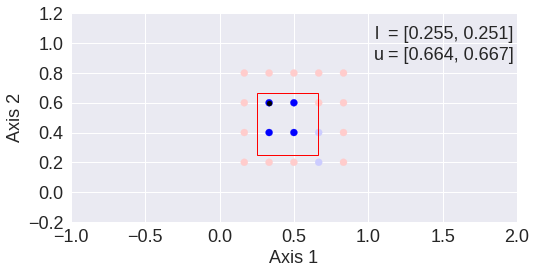

In [0]:
!rm -r frames/*
from explain_viz import explain
import tensorflow as tf
import numpy as np
from pylab import text
import imageio
import matplotlib.pyplot as plt
import matplotlib.patches as patches
def class_translator(class_num, discrete_categories):
  return (class_num + 1) * 1.0/(discrete_categories + 1)
images = []
fig, ax = plt.subplots(1)
discrete_categories = 5
n = 6
viz_xt = np.zeros((n, 2))
#viz_xt[0:int(n*0.75), 0] = class_translator(np.random.randint(2, 4, (int(n * 0.75), )).astype(float), discrete_categories)
#viz_xt[int(n*0.75):n, 0] = class_translator(np.random.randint(0, 1, (n - int(n * 0.75), )).astype(float), discrete_categories)
#viz_xt[:, 1] = np.random.uniform(0.3, 0.7, (n, ))
viz_xt[:, 0] = class_translator(np.array([1, 1, 2, 2, 3, 3]), discrete_categories)
viz_xt[:, 1] = class_translator(np.array([1, 2, 1, 2, 0, 1]), 4)
neg_xt = np.zeros((14, 2))
#neg_xt[0:int(n*0.2), 0] = class_translator(np.random.randint(1, 2, (int(n * 0.2), )).astype(float), discrete_categories)
#neg_xt[int(n*0.2):int(n*0.4), 0] = class_translator(np.random.randint(4, 5, (int(n*0.4) - int(n * 0.2), )).astype(float), discrete_categories)
#neg_xt[int(n*0.4):int(n*0.8), 0] = class_translator(np.random.randint(2, 4, (int(n*0.8) - int(n * 0.4), )).astype(float), discrete_categories)
#neg_xt[int(n*0.8):n, 0] = class_translator(np.random.randint(0, 1, (n - int(n * 0.8), )).astype(float), discrete_categories)
##temp_a = np.random.uniform(0, 0.6, (n - int(n*0.4), ))
#temp_a[temp_a[:] > 0.3] = temp_a[temp_a[:] > 0.3] + 0.4
#neg_xt[int(n * 0.4):n, 1] = temp_a[:]
#neg_xt[0:int(n*0.4), 1] = np.random.uniform(0, 1, (int(n*0.4), ))
neg_xt[:, 0] = class_translator(np.array([0, 0, 0, 0, 1, 1, 2, 2, 4, 4, 3, 3, 4, 4]), discrete_categories)
neg_xt[:, 1] = class_translator(np.array([0, 1, 2, 3, 0, 3, 0, 3, 0, 1, 2, 3, 2, 3]), 4)
def f(points):
  return np.logical_and(np.logical_or(np.equal(points[:, 0], class_translator(0.0, 5)), np.logical_or(np.equal(points[:, 0], class_translator(2.0, 5)), np.equal(points[:, 0], class_translator(3.0, 5)))), np.logical_and(np.greater(points[:, 1], 0.3), np.less(points[:, 1], 0.7)))
def plot_function(iteration, l_vals, u_vals):
  if iteration != 2970:
    return
  plt.cla()
  plt.rcParams.update({'font.size': 18})
  for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(18) 
  for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(18) 
  #plt.axis([-1, 2, -1, 2])
  plt.axis([-1.0, 2.0, -0.2, 1.2])
  currentAxis = plt.gca()
  rect_lower_0 = l_vals[0]
  rect_lower_1 = l_vals[1]
  rect_upper_0 = u_vals[0]
  rect_upper_1 = u_vals[1]
  light_red = [1.0, 0.8, 0.8]
  dark_red = [1.0, 0.0, 0.0]
  light_blue = [0.8, 0.8, 1.0]
  dark_blue = [0.0, 0.0, 1.0]
  neg_colors = []
  for i in range(neg_xt.shape[0]):
    if neg_xt[i, 0] > rect_lower_0 and neg_xt[i, 0] <= rect_upper_0 and neg_xt[i, 1] > rect_lower_1 and neg_xt[i, 1] <= rect_upper_1:
      neg_colors.append(dark_red)
    else:
      neg_colors.append(light_red)
  pos_colors = []
  for i in range(viz_xt.shape[0]):
    if viz_xt[i, 0] > rect_lower_0 and viz_xt[i, 0] <= rect_upper_0 and viz_xt[i, 1] > rect_lower_1 and viz_xt[i, 1] <= rect_upper_1:
      pos_colors.append(dark_blue)
    else:
      pos_colors.append(light_blue)
  plt.scatter(neg_xt[:, 0], neg_xt[:, 1], color = neg_colors)
  plt.scatter(viz_xt[:, 0], viz_xt[:, 1], color = pos_colors)
  plt.xlabel('Axis 1', fontsize = 18)
  plt.ylabel('Axis 2', fontsize = 18)
  text(0.68, 0.9,'l',
     horizontalalignment='left',
     verticalalignment='center',
     transform = ax.transAxes)
  text(0.71, 0.9,'= [' + pretty_print(str(np.around(l_vals[0], decimals = 3))) + ', ' + pretty_print(str(np.around(l_vals[1], decimals = 3))) + ']',
     horizontalalignment='left',
     verticalalignment='center',
     transform = ax.transAxes)
   
  #pretty_print(str(np.around(u_vals[0], decimals = 3))) +
  text(0.68, 0.8,'u',
     horizontalalignment='left',
     verticalalignment='center',
     transform = ax.transAxes)
  text(0.71, 0.8,'= [' + pretty_print(str(np.around(u_vals[0], decimals = 3))) + ', ' + pretty_print(str(np.around(u_vals[1], decimals = 3))) + ']',
     horizontalalignment='left',
     verticalalignment='center',
     transform = ax.transAxes)
  if rect_lower_0 < rect_upper_0 and rect_lower_1 < rect_upper_1:
      color = 'r'
  else:
      color = 'g'
  rect = patches.Rectangle((rect_lower_0, rect_lower_1), rect_upper_0 - rect_lower_0, rect_upper_1 - rect_lower_1, linewidth = 1, edgecolor = 'r', facecolor = 'none', zorder = 10)
  currentAxis.add_patch(rect)
  plt.scatter([class_translator(1.0, 5)], [class_translator(2.0, 4)], s = [25.0], color = 'black', zorder = 20)
  #plt.xticks(np.arange(-1.0, 2.0, 0.4))
  #plt.yticks(np.arange(-0.2, 1.2, 0.2))
  plt.gca().set_aspect('equal', adjustable='box')
  #plt.savefig("frames/" + str(iteration) + ".pdf")
  plt.savefig("frames/Discrete_both_0_pt_95.pdf", bbox_inches = "tight")
  #images.append(imageio.imread("frames/" + str(iteration) + ".png"))
class synth(explain):
  def sampling(self, num_sampled_points):
    #sampled_points = np.random.uniform(0.0, 1.0, (num_sampled_points, 2))
    sampled_points = np.zeros((20, 2))
    f_values = np.zeros((20, ))
    for i in range(4):
      for j in range(5):
        sampled_points[i * 5 + j, 0] = class_translator(j, 5)
        sampled_points[i * 5 + j, 1] = class_translator(i, 4)
        if (i == 1 or i == 2) and (j == 1 or j == 2):
          f_values[i * 5 + j] = 1
        if (i == 0 or i == 1) and (j == 3):
          f_values[i * 5 + j] = 1
    #print sampled_points
    #print f_values
          
    #sampled_points = np.random.uniform(0.0, 1.0, (num_sampled_points, 2))
    #sampled_points[0:num_sampled_points/2, :] = np.random.uniform(self.temp_l_vec_values, self.temp_u_vec_values, (num_sampled_points/2, 2))
    #sampled_points[:, 0] = class_translator(np.random.randint(0, discrete_categories, (num_sampled_points, )).astype(float), discrete_categories)
    #sampled_points[0:num_sampled_points/2, :] = np.random.uniform(self.temp_l_vec_values, self.temp_u_vec_values, (num_sampled_points/2, 2))
    
    #f_values = f(sampled_points)
    return sampled_points, f_values
point = np.array([class_translator(1.0, 5), class_translator(2.0, 4)])
synth_object = synth(point, 20, np.array([[1]]), 100, 5, 0.95, plot_function)
synth_object.fit_explanation(3000)
prefix = "Discrete_0.55_"
print synth_object.u_vec_values
#imageio.mimsave("animations/" + prefix + "animation.gif", images, loop = 1)
#print synth_object.temp_l_vec_values, synth_object.temp_u_vec_values


Iteration      Loss                  Cov                   Prec                  Analytic Cov          Analytic Prec         
1              -0.439269946671       0.410247154268        0.00580455848053      0.5                   0.002                 
1001           -0.7516093939         0.7516093939          0.94034206621         0.739                 0.956698240866        
2001           -5.52451023059        0.859117141181        0.933078617882        0.874                 0.948512585812        
[0.2660529 0.       ]


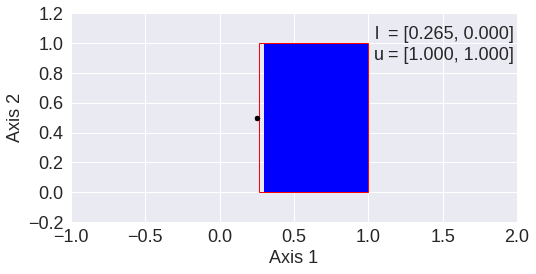

In [0]:
!rm -r frames/*
from explain_viz import explain
import tensorflow as tf
import numpy as np
import imageio
import matplotlib.pyplot as plt
import shapely.geometry as sg
import descartes
from pylab import text
import matplotlib.patches as patches
images = []
fig, ax = plt.subplots(1)
def f(points):
  return np.logical_or(np.greater(points[:, 0], 0.3), np.logical_and(np.equal(points[:, 0], 0.25), np.equal(points[:, 1], 0.5)))
def pretty_print(string):
  return string + "0" * (5 - len(string))
def plot_function(iteration, l_vals, u_vals):
  if iteration != 2970:
    return
  plt.cla()
  plt.rcParams.update({'font.size': 18})
  for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(18) 
  for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(18) 
  #plt.axis([-1, 2, -1, 2])
  plt.axis([-1.0, 2.0, -0.2, 1.2])
  currentAxis = plt.gca()
  rect_lower_0 = l_vals[0]
  rect_lower_1 = l_vals[1]
  rect_upper_0 = u_vals[0]
  rect_upper_1 = u_vals[1]
  plt.xlabel('Axis 1', fontsize = 18)
  plt.ylabel('Axis 2', fontsize = 18)
  text(0.68, 0.9,'l',
     horizontalalignment='left',
     verticalalignment='center',
     transform = ax.transAxes)
  text(0.71, 0.9,'= [' + pretty_print(str(np.around(l_vals[0], decimals = 3))) + ', ' + pretty_print(str(np.around(l_vals[1], decimals = 3))) + ']',
     horizontalalignment='left',
     verticalalignment='center',
     transform = ax.transAxes)
   
  #pretty_print(str(np.around(u_vals[0], decimals = 3))) +
  text(0.68, 0.8,'u',
     horizontalalignment='left',
     verticalalignment='center',
     transform = ax.transAxes)
  text(0.71, 0.8,'= [' + pretty_print(str(np.around(u_vals[0], decimals = 3))) + ', ' + pretty_print(str(np.around(u_vals[1], decimals = 3))) + ']',
     horizontalalignment='left',
     verticalalignment='center',
     transform = ax.transAxes)
  if rect_lower_0 < rect_upper_0 and rect_lower_1 < rect_upper_1:
      color = 'r'
  else:
      color = 'g'
  plt.scatter([0.25], [0.5], s = [25.0], color = 'black')
  rect_sg1 = sg.Polygon([(0.3, 0.0), (1.0, 0.0), (1.0, 1.0), (0.3, 1.0)])
  rect_sg = sg.Polygon([(l_vals[0], l_vals[1]), (u_vals[0], l_vals[1]), (u_vals[0], u_vals[1]), (l_vals[0], u_vals[1])])
  intersection = rect_sg.intersection(rect_sg1)
  rect1 = patches.Rectangle((0.3, 0), 1-0.3, 1, linewidth = 0, edgecolor = color, facecolor = [0.8, 0.8, 1.0])
  rect = patches.Rectangle((rect_lower_0, rect_lower_1), rect_upper_0 - rect_lower_0, rect_upper_1 - rect_lower_1, linewidth = 1, edgecolor = 'r', facecolor = 'none', zorder = 10)
  currentAxis.add_patch(rect1)
  currentAxis.add_patch(rect)
  plt.scatter([0.25], [0.5], s = [25.0], color = 'black', zorder = 20)
  #plt.xticks(np.arange(-1.0, 2.0, 0.4))
  #plt.yticks(np.arange(-0.2, 1.2, 0.2))
  ax.add_patch(descartes.PolygonPatch(intersection, fc = 'b', linewidth = 0, zorder = 7))
  plt.gca().set_aspect('equal', adjustable='box')
  plt.savefig("frames/Constraint_off.pdf", bbox_inches = "tight")
  #images.append(imageio.imread("frames/" + str(iteration) + ".png"))
class synth(explain):
  def sampling(self, num_sampled_points):
    sampled_points = np.random.uniform(0.0, 1.0, (num_sampled_points, 2))
    sampled_points[0:num_sampled_points/2, :] = np.random.uniform(self.temp_l_vec_values, self.temp_u_vec_values, (num_sampled_points/2, 2))
    sampled_points[0, 0] = 0.25
    sampled_points[0, 1] = 0.5
    f_values = f(sampled_points)
    return sampled_points, f_values
point = np.array([0.25, 0.5])
synth_object = synth(point, 1000, np.array([f(np.array([point]))]), 5, 0, 0.95, plot_function)
synth_object.fit_explanation(3000)
print synth_object.l_vec_values
#prefix = "HalfWindow_0.92_on_"
#imageio.mimsave("animations/" + prefix + "animation.gif", images, loop = 0)